<a href="https://colab.research.google.com/github/iqbal-hasan291/medical-data-hypothesis-testing/blob/main/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libaries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv("/content/patient_status_cleaned.csv")

In [ ]:
df.head()

,Patient_ID,Age,Gender,Tumour_Stage,Histology,Estrogen receptor status,Progesterone receptor status,HER2 receptor status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,09-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,09-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,27-Jun-19,Dead


In [ ]:
df.columns = df.columns.str.strip()       # remove leading/trailing spaces
print(df.columns.tolist())


['Patient_ID', 'Age', 'Gender', 'Tumour_Stage', 'Histology', 'Estrogen receptor status', 'Progesterone receptor status', 'HER2 receptor status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Patient_Status']


# Test 1 :  Tumour Stage vs Surgery_type

In [ ]:
crosstab_df = pd.crosstab(df['Tumour_Stage'], df['Surgery_type'])
crosstab_df

Surgery_type,Lumpectomy,Modified Radical Mastectomy,Other,Simple Mastectomy
Tumour_Stage,,,,
I,22,7,18,13
II,36,45,56,43
III,8,37,23,9


In [ ]:
# Print contingency table with cells coloured according to magnitude
crosstab_df.style.background_gradient(cmap='Blues',vmin = 0,vmax = 100)

Surgery_type,Lumpectomy,Modified Radical Mastectomy,Other,Simple Mastectomy
Tumour_Stage,,,,
I,22,7,18,13
II,36,45,56,43
III,8,37,23,9


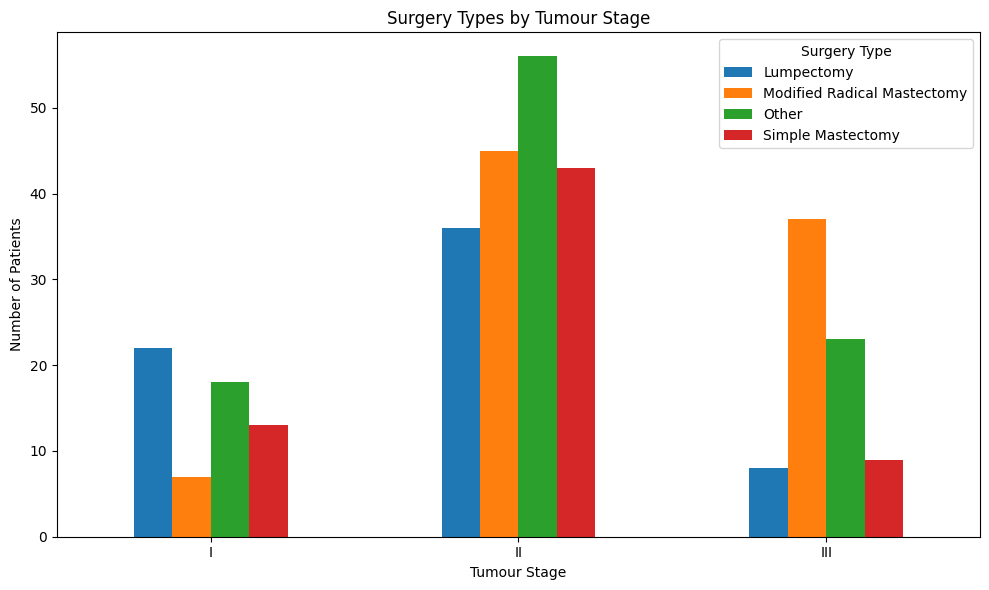

In [ ]:
ct = pd.crosstab(df['Tumour_Stage'], df['Surgery_type'])
ct.plot(kind='bar', figsize=(10,6))
plt.title('Surgery Types by Tumour Stage')
plt.xlabel('Tumour Stage')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend(title='Surgery Type')
plt.tight_layout()
plt.show()


# Test 2 : HER2 receptor status vs patient_stage

In [ ]:
crosstab_df2 = pd.crosstab(df['HER2 receptor status'], df['Patient_Status'])
crosstab_df2

Patient_Status,Alive,Dead
HER2 receptor status,,
Negative,230,58
Positive,25,4


In [ ]:
# Print contingency table with cells coloured according to magnitude
crosstab_df2.style.background_gradient(cmap='berlin',vmin = 0,vmax = 100)

Patient_Status,Alive,Dead
HER2 receptor status,,
Negative,230,58
Positive,25,4


In [ ]:
# define a Berlin-style palette (you can tweak)
berlin_colors = ['#d73027',  # deep red
                 '#4575b4',  # Berlin blue
                 '#313131',  # dark grey/black
                 '#66c2a5']  # teal-green

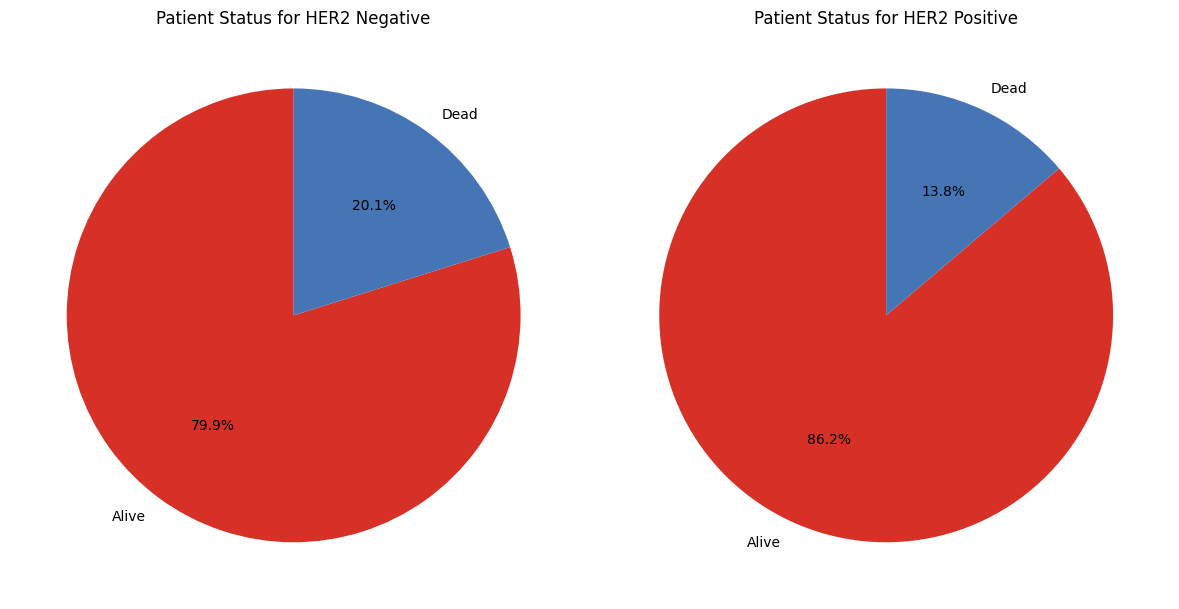

In [ ]:
fig, axes = plt.subplots(1, len(crosstab_df2.index), figsize=(12,6))
for ax, status in zip(axes, crosstab_df2.index):
    crosstab_df2.loc[status].plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        colors=berlin_colors,
        ax=ax
    )
    ax.set_title(f'Patient Status for HER2 {status}')
    ax.set_ylabel('')  # remove y-label

plt.tight_layout()
plt.show()

# Hypothesis Testing Framwork

# Test 1

*Goal: To determine whether the type of surgery a patient receives depends on their tumour*

**H₀ (Null Hypothesis):**
Tumour stage and surgery type are independent.

**H₁ (Alternative Hypothesis):**
Tumour stage and surgery type are associated.

*The significance level alpha is set to 0.05.*

**Why Chi-Square Test?**
Chi-square is designed exactly for categorical variables to test whether there’s a relationship (association) between them.

# Here, we need to perform the Chi-square Test of Independence.

In [ ]:
# Store the output of the test function into variables
stat1, p1, dof1, expected1 = chi2_contingency(crosstab_df, correction = False)

In [ ]:
# Print full report
print("Chi-square Test of Independence:")
print("----------------------------------------")
print(f"Test 1: Tumour Stage vs Surgery Type")
print(f"Chi-square statistic (χ²): {stat1:.4f}")
print(f"Degrees of freedom (df): {dof1}")
print(f"P-value: {p1:.6f}")
print("Expected frequencies:")
print(pd.DataFrame(expected1, index=crosstab_df.index, columns=crosstab_df.columns))

Chi-square Test of Independence:
----------------------------------------
Test 1: Tumour Stage vs Surgery Type
Chi-square statistic (χ²): 32.6230
Degrees of freedom (df): 6
P-value: 0.000012
Expected frequencies:
Surgery_type  Lumpectomy  Modified Radical Mastectomy      Other  \
Tumour_Stage                                                       
I              12.492114                    16.845426  18.359621   
II             37.476341                    50.536278  55.078864   
III            16.031546                    21.618297  23.561514   

Surgery_type  Simple Mastectomy  
Tumour_Stage                     
I                     12.302839  
II                    36.908517  
III                   15.788644  


In [ ]:
#Outcome
alpha = 0.05
if p1 < alpha:
    print("Result: p-value < 0.05 → Reject H0. There is a statistically significant association between the variables.")
else:
    print("Result: p-value ≥ 0.05 → Fail to reject H0. There is no statistically significant association between the variables.")

Result: p-value < 0.05 → Reject H0. There is a statistically significant association between the variables.


**Interpretation :**
*Since the p-value < 0.05, we reject the null hypothesis (H₀). This indicates that surgical decisions are dependent on tumour stage.*

# Test 2

*Goal: To determine whether HER2 receptor status is associated with patient outcomes*

**H₀ (Null Hypothesis):**
HER2 receptor status and patient status are independent.

**H₁ (Alternative Hypothesis):**
HER2 receptor status and patient status are associated.


*The significance level alpha is set to 0.05.*

# Here, we need to perform the Chi-square Test of Independence.

In [ ]:
# Store the output of the test function into variables
stat, p, dof,expected = chi2_contingency(crosstab_df2 , correction = False)

In [ ]:
# Print full report
print("Chi-square Test of Independence")
print("-------------------------------")
print(f"Test 2: HER2 receptor status vs patient outcomes")
print(f"Chi-square statistic (χ²): {stat:.4f}")
print(f"Degrees of freedom (df): {dof}")
print(f"P-value: {p:.4f}")
print("Expected frequencies:")
print(pd.DataFrame(expected, index=crosstab_df2.index, columns=crosstab_df2.columns))

Chi-square Test of Independence
-------------------------------
Test 2: HER2 receptor status vs patient outcomes
Chi-square statistic (χ²): 0.6744
Degrees of freedom (df): 1
P-value: 0.4115
Expected frequencies:
Patient_Status             Alive       Dead
HER2 receptor status                       
Negative              231.671924  56.328076
Positive               23.328076   5.671924


In [ ]:
#Outcome
alpha = 0.05
if p < alpha:
    print("Result: p-value < 0.05 → Reject H0. There is a statistically significant association between the variables.")
else:
    print("Result: p-value ≥ 0.05 → Fail to reject H0. There is no statistically significant association between the variables.")

Result: p-value ≥ 0.05 → Fail to reject H0. There is no statistically significant association between the variables.


**Interpretation:**
*Since the p-value > 0.05, we fail to reject the null hypothesis (H₀). This indicates that patient outcome is independent of HER2 receptor status in this dataset—there’s no statistically significant relationship.*